<a href="https://colab.research.google.com/github/idild13/instagram-likes-prediction/blob/main/notebooks%20/01_instagram_likes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 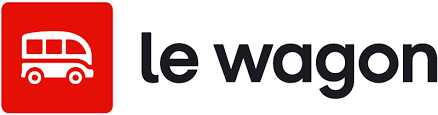

# Instagram likes prediction

In this challenge, we'll be taking Linear Regression further by seeing if we can predict some metrics from social media!

Let's get started!

## Data Exploration

a) Download the [dataset](https://drive.google.com/file/d/1O8ey3uytjqzRUQXTnmXkiqGBoa6lne1C/view?usp=sharing) and upload it to Google Colab. Execute the cell below to load data in a `posts` dataframe. One row of this dataset represents an Instagram post. Pay attention to the compression format of the file!

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving posts 2.csv to posts 2.csv


In [ ]:
import pandas as pd
df_posts = pd.read_csv("posts 2.csv")
print(df_posts)


               id  followers  comments  posts  likes                   ts
0        6e56f910       1804         2    851     73  2017-10-08 16:21:28
1        0bea9208        542         1    846      7  2017-07-07 11:58:18
2        88ec6c3f        669         2   1495     33  2018-03-19 17:22:29
3        006b0d03        757         9    144    166  2018-09-02 18:49:52
4        c8a0f2a6        539         4    453     71  2018-04-18 14:15:36
...           ...        ...       ...    ...    ...                  ...
2260897  f58b19ab       1847        14    678    166  2018-09-10 15:02:43
2260898  58433abf        237         1    192     31  2018-10-13 10:02:59
2260899  10c4b02c        267         2    110     35  2018-09-18 22:42:03
2260900  0f7064e1        214         3     53     50  2018-11-01 11:32:57
2260901  b0fd717e        510         0    417     31  2018-09-29 10:14:18

[2260902 rows x 6 columns]


In [ ]:
!pip install -U kaleido
import plotly.io as pio

In [ ]:
!pip install -U plotly kaleido

b) Column `id` designates the author. How many **unique** authors do we have ?

In [ ]:
counts = df_posts["id"].value_counts()

print(counts)

# 9298 unique authors

id
7782811f    1954
7ab0f67e    1909
b1b9a24e    1887
f7b93f3c    1881
73b562fb    1879
            ... 
1f515437       1
364a84f2       1
7fa50c88       1
7723eeb0       1
124614bc       1
Name: count, Length: 9298, dtype: int64


c) Sort `df_posts` by **ascending date**.

In [ ]:
sort = df_posts.sort_values(by="ts", ascending=True)
print(sort)

               id  followers  comments  posts  likes                   ts
651352   8fd5eb8f        560         1   1270      8  2015-01-01 00:00:03
1066195  e118b32e        711         0    646     23  2015-01-01 00:00:37
1275101  c2c2c06e       1703         0    811     18  2015-01-01 00:03:10
404586   d15ab509        357         1    794     10  2015-01-01 00:04:01
1180122  9473b9d1        207         0    217      2  2015-01-01 00:04:18
...           ...        ...       ...    ...    ...                  ...
1747502  bd90c5ec        840         1    120    107  2019-03-10 23:53:48
673328   2e246173        582         2     12     27  2019-03-10 23:53:54
1860496  b0817588       1751         0    704     23  2019-03-10 23:54:41
1883069  4bdf6fc3       1250         2    303     42  2019-03-10 23:57:42
1487881  b74fb885        645         0    192      3  2019-03-10 23:58:31

[2260902 rows x 6 columns]


d) This dataset contains several posts for the same author.

By using the pandas function `drop_duplicates()` with parameter `keep=last`, **keep only the last post** made by each author.

This should leave you with a dataframe with as many rows as unique authors!

In [ ]:
df_unique_authors = sort.drop_duplicates(subset="id", keep="last")
print(df_unique_authors.shape)   # should equal number of unique authors
print(df_unique_authors)

(9298, 6)
               id  followers  comments  posts  likes                   ts
1955601  c43f3233       1532         2     76    177  2016-03-26 20:15:50
145849   38cc9619       1395        10    152    192  2016-04-01 14:53:58
66276    58ce1b8d        582         1     80     32  2016-06-23 12:28:21
1922869  0dd11d6c       1566         0     57    150  2016-07-24 19:29:49
563184   688eb92e       1675         1    159    166  2016-08-24 21:15:57
...           ...        ...       ...    ...    ...                  ...
1747502  bd90c5ec        840         1    120    107  2019-03-10 23:53:48
673328   2e246173        582         2     12     27  2019-03-10 23:53:54
1860496  b0817588       1751         0    704     23  2019-03-10 23:54:41
1883069  4bdf6fc3       1250         2    303     42  2019-03-10 23:57:42
1487881  b74fb885        645         0    192      3  2019-03-10 23:58:31

[9298 rows x 6 columns]


e) Use Plotly to draw a scatter plot between likes and followers. Do you see any **correlation**?


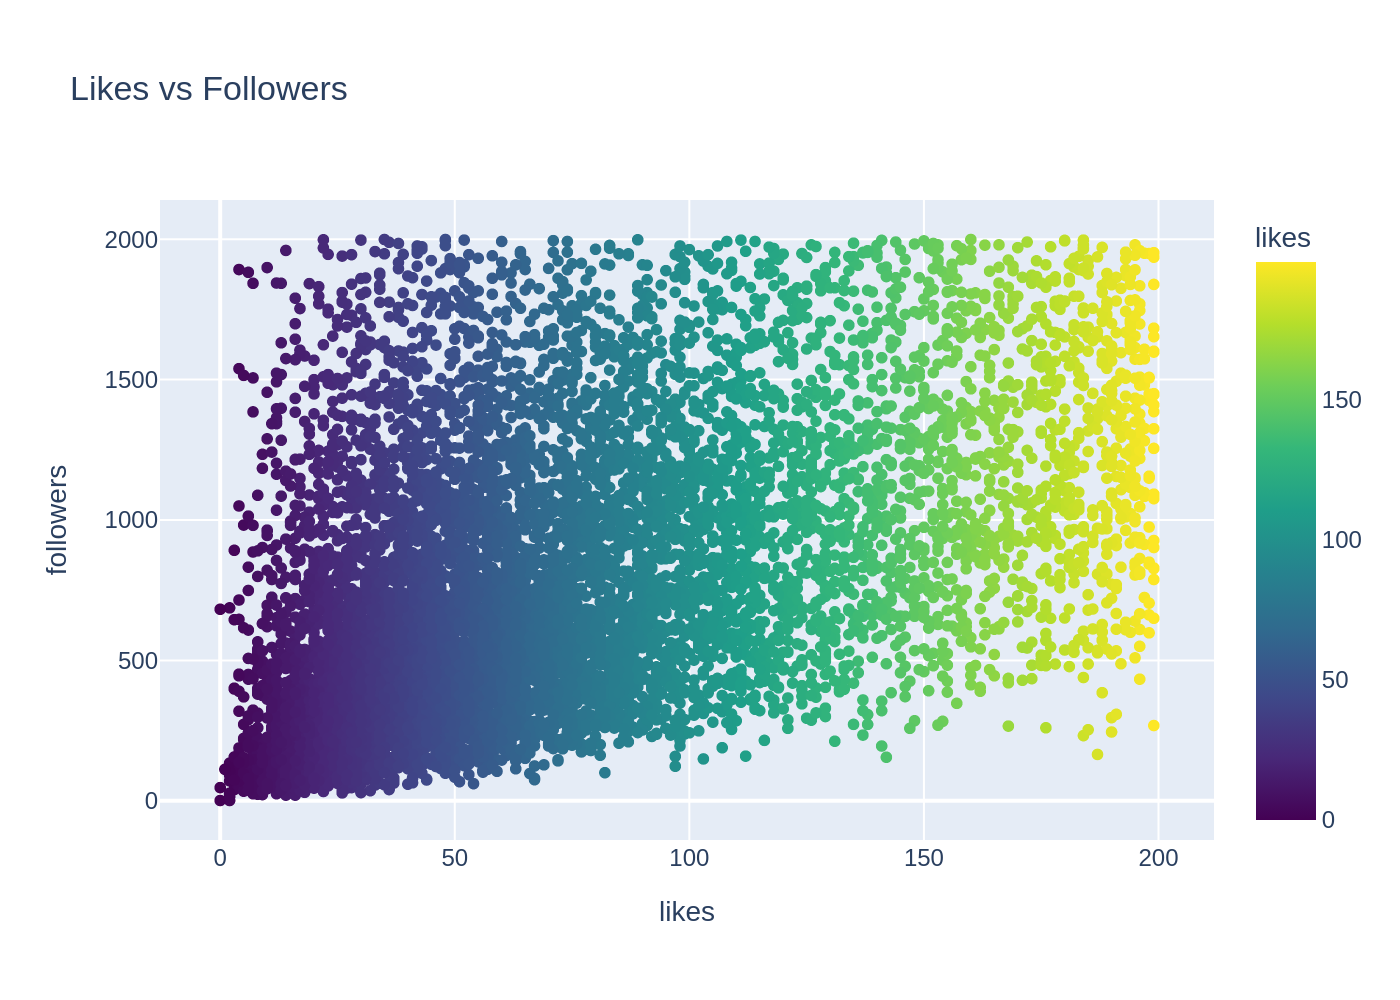

In [ ]:
import plotly.express as px
import plotly.io as pio
import kaleido

fig = px.scatter(
    df_unique_authors,
    x="likes",
    y="followers",
    color="likes",
    color_continuous_scale="Viridis",
    title="Likes vs Followers"
)
fig.show()

# save static image so GitHub can display it
# Install chrome
kaleido.get_chrome_sync()
pio.write_image(fig, "likes_vs_followers.png", scale=2)

from IPython.display import Image, display
display(Image("likes_vs_followers.png"))

This visual correlation that we see will serve as the intuition for the modelling that we are about to do!

## Modeling

### Preprocessing

a) Isolate the target and the feature!

For our first model, we'll start with the feature being the number of followers. The target, as you already know, is the number of likes!

**Assign X and y appropriately!**

In [ ]:
X = df_posts[['followers']]
y = df_posts['likes']

b) Remember what we said about the importance of separating data into train and test splits?

Split X and y, **80% for training and 20% for testing** into appropriately named variables - X_train, X_test, y_train and y_test.

Don't make your life difficult, use the `train_test_split` function!

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #random_state=42 is just a way to set the seed for the random number generator, so that the random split is reproducible. If you leave out random_state, the split could be different every run.
    #Why 42? It’s an arbitrary number, often used as a geeky joke/reference to “The Hitchhiker’s Guide to the Galaxy” where 42 is the “answer to life, the universe, and everything.” You could use any number, e.g. random_state=1, and it would work the same.
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1808721, 1)
X_test shape: (452181, 1)
y_train shape: (1808721,)
y_test shape: (452181,)


c) Now we need to normalize! I know you're excited to apply your new modelling skills, but we first need to make sure the data is scaled!

Scale X_train and X_test - remember to only fit the scaler on X_train and to transform X_train and X_test!

Let's use the standard scaler 👍

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data.
X_train_scaled = pd.DataFrame(    #why we did it like this (and same for below cell): Why this is better: 1) Keeps column names (followers), 2) Keeps row indices aligned, 3) Avoids the UserWarning later when predicting, 4) Makes debugging easier because you can still call X_train_scaled.head() and see labeled data instead of just raw arrays
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

# Transform test data (using same scaler!)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("Before scaling:\n", X_train[:5])
print("\nAfter scaling:\n", X_train_scaled[:5])

Before scaling:
          followers
790946        1143
1114144       1218
1989331        194
654864         641
1911153        576

After scaling:
          followers
790946    0.551854
1114144   0.705015
1989331  -1.386140
654864   -0.473302
1911153  -0.606041


### Linear Regression

d) Train a Linear Regression model that predicts likes (our y) based on followers (our X)! Remember to only train it on our **scaled training set**, not on our test set!

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

print("Model coefficient (slope):", model.coef_[0])
print("Model intercept:", model.intercept_)

Model coefficient (slope): 14.670665026287741
Model intercept: 48.113717372662784


### Evaluation

e) What is the R2 score on the train data? What is the MSE (mean squared error)? What about the MAE (mean absolute error)?

Do you think our model is performing well?

<details>
<summary><i>Hint</i></summary>
    ⟿  Use `mean_squared_error` and `mean_absolute_error` of module `sklearn.metrics`.
</details>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Metrics
r2_train = model.score(X_train_scaled, y_train)   # R² score
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("R² score (train):", r2_train)
print("MSE (train):", mse_train)
print("MAE (train):", mae_train)

#	•	R² = 0.13 (~13%)
# → This means that only ~13% of the variance in likes can be explained by followers. That’s quite low, so the linear relationship between followers and likes is weak.
#•	MSE = 1402
# → As you said, MSE is less intuitive because it’s in squared units of the target (likes²). It’s more useful when comparing different models, but harder to interpret directly.
#	•	MAE ≈ 28.5 likes
# → Much easier to interpret: on average, our model’s predictions are off by about 28–30 likes.

R² score (train): 0.1330744619469425
MSE (train): 1402.1248286062234
MAE (train): 28.482381144420422


R2 is close to 0, so the model doesn't look very good.
MSE is quite difficult to interpret, but MAE is much simpler. Our model has an error of 32 likes on average.

f) It's time to evaluate our model on test data!

Use your model to predict likes for test data and store the predictions in 'pred_model_1'.

In [ ]:
pred_model_1 = model.predict(X_test_scaled)

print(pred_model_1[:10])

[47.22190381 45.09477222 63.25028981 75.8033622  51.05673261 46.74255021
 38.38382182 33.68016462 38.44374102 47.31178261]


g) What is R2 score value on test data? What is the MSE (mean squared error)?

Do you think our model is a good one?

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on test set
pred_model_2 = model.predict(X_test_scaled)

# R² score on test data
r2_test = model.score(X_test_scaled, y_test)

# MSE on test data
mse_test = mean_squared_error(y_test, pred_model_2)

# MAE and RMSE for interpretation
mae_test = mean_absolute_error(y_test, pred_model_2)
rmse_test = mse_test ** 0.5

print("R² score (test):", r2_test)
print("MSE (test):", mse_test)
print("MAE (test):", mae_test)
print("RMSE (test):", rmse_test)

R² score (test): 0.13178764910080432
MSE (test): 1397.5154706334465
MAE (test): 28.453116094940675
RMSE (test): 37.383358204332666


Results are similar, our model is not really good. It was expected because with such simple model, you cannot get very accurate results.

h) We will try to add one feature to our model.

What does this code do?

In [ ]:
# load data
archive = pd.read_csv('posts.csv') # Changed 'posts.csv.bz' to 'posts.csv'

# sort values by date
archive = archive.sort_values(by='ts', ascending=True)

# keep only most recent posts
most_recent_posts = archive.drop_duplicates('id', keep='last')

# keep from archive every posts except most recent
posts_wo_most_recent = archive[~archive.index.isin(most_recent_posts.index)]

# compute median of likes on previous posts
median_last_posts = posts_wo_most_recent.groupby('id', as_index=False)[['likes']].median()

# rename column likes by historical_likes
median_last_posts = median_last_posts.rename({'likes': 'historical_likes'}, axis=1)

# merge this colum to initial dataframe
df_posts_new = most_recent_posts.merge(median_last_posts, on="id")

i) Have a look at `df_posts_new` to understand what the previous code did!

In [ ]:
df_posts_new

,id,followers,comments,posts,likes,ts,historical_likes
0,c43f3233,1532,2,76,177,2016-03-26 20:15:50,146.0
1,38cc9619,1395,10,152,192,2016-04-01 14:53:58,187.0
2,58ce1b8d,582,1,80,32,2016-06-23 12:28:21,17.5
3,0dd11d6c,1566,0,57,150,2016-07-24 19:29:49,168.0
4,688eb92e,1675,1,159,166,2016-08-24 21:15:57,149.0
...,...,...,...,...,...,...,...
9242,bd90c5ec,840,1,120,107,2019-03-10 23:53:48,52.0
9243,2e246173,582,2,12,27,2019-03-10 23:53:54,108.5
9244,b0817588,1751,0,704,23,2019-03-10 23:54:41,26.0
9245,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42,44.0


j) Let's start all over, but now X is **followers and historical likes**.

Split X and y!

In [ ]:
X = df_posts_new[['followers', 'historical_likes']]
y = df_posts_new['likes']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9247, 2)
y shape: (9247,)


k) Split into train and test split!

In [ ]:
from sklearn.model_selection import train_test_split

# Step 2: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7397, 2)
X_test shape: (1850, 2)
y_train shape: (7397,)
y_test shape: (1850,)


l) Scale!

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (7397, 2)
X_test_scaled shape: (1850, 2)


m) Time to train a new model!

Train a new linear regression with our new `X_train_scaled`!

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
model_new = LinearRegression()
model_new.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model_new.predict(X_test_scaled)

print("Model coefficient (slope):", model_new.coef_[0])
print("Model intercept:", model_new.intercept_)

Model coefficient (slope): 9.651399118144424
Model intercept: 71.9125321076112


i) Calculate R2, MSE and MAE on the test data. What do you think of this new model?

In [ ]:
# Predictions on test set
y_test_pred = model_new.predict(X_test_scaled)

# Metrics
r2_test = model_new.score(X_test_scaled, y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5

print("📊 Test Performance:")
print("R² score (test):", r2_test)
print("MSE (test):", mse_test)
print("MAE (test):", mae_test)
print("RMSE (test):", rmse_test)

📊 Test Performance:
R² score (test): 0.5571651369396615
MSE (test): 1006.7056382659536
MAE (test): 23.405287123961582
RMSE (test): 31.728624903483503


This model is better, with an average error of around 23 likes.
R2 is much better than the previous model.

In [ ]:
display(df_posts_new)

,id,followers,comments,posts,likes,ts,historical_likes
0,c43f3233,1532,2,76,177,2016-03-26 20:15:50,146.0
1,38cc9619,1395,10,152,192,2016-04-01 14:53:58,187.0
2,58ce1b8d,582,1,80,32,2016-06-23 12:28:21,17.5
3,0dd11d6c,1566,0,57,150,2016-07-24 19:29:49,168.0
4,688eb92e,1675,1,159,166,2016-08-24 21:15:57,149.0
...,...,...,...,...,...,...,...
9242,bd90c5ec,840,1,120,107,2019-03-10 23:53:48,52.0
9243,2e246173,582,2,12,27,2019-03-10 23:53:54,108.5
9244,b0817588,1751,0,704,23,2019-03-10 23:54:41,26.0
9245,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42,44.0
